# 5003 HW8

ZHANG Juntao -20908272

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from sklearn import linear_model
from scipy.stats import t
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error, r2_score

### Scrape data

In [2]:
r = requests.get('http://lib.stat.cmu.edu/datasets/boston')
contents = r.text.split() 
start = contents.index('0.00632')
data = contents[start:]
res = np.zeros(len(data))
for i in range(len(data)):
    res[i] = float(data[i])
res = res.reshape((506,14)) 
df = pd.DataFrame(res)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD','TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### A: Simple linear regression

Problem 1

In [4]:
X, Y = df[['LSTAT']].values, df['MEDV'].values
reg = linear_model.LinearRegression()
reg.fit(X, Y)
print('Simple Liner Regression Slope: %.3f' % reg.coef_[0])
print('Simple Liner Regression Intercept: %.3f' % reg.intercept_)

Simple Liner Regression Slope: -0.950
Simple Liner Regression Intercept: 34.554


Problem 2

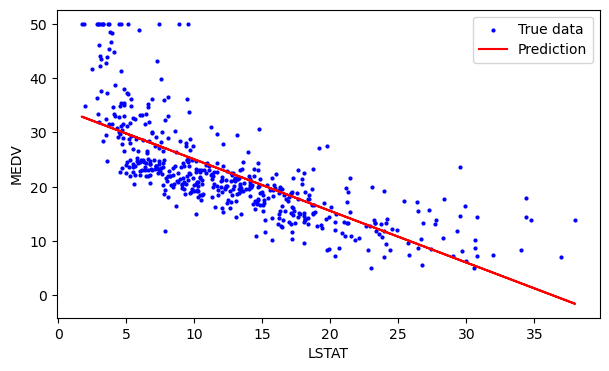

In [5]:
plt.figure(figsize=(7,4))
plt.scatter(X, Y, c='blue', label='True data', s=4)
plt.plot(X, reg.predict(X), c='red', label='Prediction')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.show()

Problem 3

In [6]:
model = sm.OLS(df.MEDV, sm.add_constant(df.LSTAT))
result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           5.08e-88
Time:                        12:02:13   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above results, the 95% confidence interval of $\beta_{0}$ is [33.448, 35.659],
the 95% confidence interval of $\beta_{1}$ is [-1.026, -0.874]

Problem 4 & Problem 5

In [7]:
def get_CI_PI(new_data, x, y, alpha=0.05):
    Sxx = np.sum((x-np.mean(x))**2)
    Syy = np.sum((y-np.mean(y))**2)
    Sxy = np.sum((x-np.mean(x))*(y-np.mean(y)))
    dof = len(x) - 2
    reg = linear_model.LinearRegression()
    reg.fit(x, y)
    a, b = reg.intercept_, reg.coef_[0]
    sigma = np.sqrt((Syy - a*Sxy)/dof)
    t_value = t.isf(alpha/2, dof)
    ci_down = np.round(a*new_data+b - t_value*sigma*np.sqrt(1./len(x)+(new_data-np.mean(x))**2/Sxx), 3)
    ci_up = np.round(a*new_data+b + t_value*sigma*np.sqrt(1./len(x)+(new_data-np.mean(x))**2/Sxx), 3)
    pi_down = np.round(a*new_data+b - t_value*sigma*np.sqrt(1.+1./len(x)+(new_data-np.mean(x))**2/Sxx), 3)
    pi_up = np.round(a*new_data+b + t_value*sigma*np.sqrt(1.+1./len(x)+(new_data-np.mean(x))**2/Sxx), 3)                    
    print(f'The {(1-alpha)*100}% Confidence Interval of the expected MEDV when LSTAT={new_data}:[{ci_down}, {ci_up}]')                                                                    
    print(f'The {(1-alpha)*100}% Prediction Interval of the expected MEDV when LSTAT={new_data}:[{pi_down}, {pi_up}]')

In [8]:
lis = [4, 10, 14]
for item in lis:
    get_CI_PI(item, X, Y)

The 95.0% Confidence Interval of the expected MEDV when LSTAT=4:[136.001, 138.529]
The 95.0% Prediction Interval of the expected MEDV when LSTAT=4:[119.134, 155.397]
The 95.0% Confidence Interval of the expected MEDV when LSTAT=10:[343.73, 345.446]
The 95.0% Prediction Interval of the expected MEDV when LSTAT=10:[326.481, 362.696]
The 95.0% Confidence Interval of the expected MEDV when LSTAT=14:[481.985, 483.622]
The 95.0% Prediction Interval of the expected MEDV when LSTAT=14:[464.698, 500.91]


### B: Multiple linear regression

Problem 6

In [9]:
X1, Y = df[['LSTAT', 'AGE']].values, df['MEDV'].values
reg1 = linear_model.LinearRegression()
reg1.fit(X1, Y)
print('Regression coefficients:', reg1.intercept_, reg1.coef_[0], reg1.coef_[1])

Regression coefficients: 33.2227605317929 -1.0320685641826013 0.03454433857164608


Problem 7

In [10]:
Y_pred = reg1.predict(X1)
r2_score(Y, Y_pred)

0.5512689379421003

Validation

In [11]:
model = sm.OLS(df.MEDV, sm.add_constant(df[['LSTAT', 'AGE']]))
result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           2.98e-88
Time:                        12:02:13   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
LSTAT         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
AGE            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conslusion:
- Therefore, $\beta_{0}=33.223$, $\beta_{1}=-1.032$, $\beta_{2}=0.035$, and $R^{2}=0.551$